# Recipes for ggplot

In this notebook you can find code snippets that I always reuse for simulating dataset

- toc: true 
- badges: true
- comments: false
- categories: [r][ggplot][tidyverse][plot]


- dummy dataset of domension **row = 1000  col = 3**

In [57]:
#in order to obtain ALWAYS same "random" results REMEMBER TO initialize the seed 
#set.seed(42) 

number_of_rows <- 3000
A <- rnorm( n = number_of_rows, mean = 100, sd = 1 ) 
B <- rnorm( n = number_of_rows, mean = 90, sd = 5 ) 
C <- rnorm( n = number_of_rows, mean = 120, sd = 2 ) 

dat=data.frame(A,B,C) 

dat




A,B,C
<dbl>,<dbl>,<dbl>
99.66796,82.46500,123.6971
99.47555,92.06442,119.5556
100.59727,88.57894,121.0849
99.33420,93.17188,118.1546
99.67042,84.05812,119.4433
100.01770,90.94176,120.0102
100.65719,88.54614,119.9084
100.75391,84.24006,123.2111
100.40094,89.07158,120.2089


- First of all we load the required libraries, we convert the data frame into a `data.table`, we `melt` the data.table 
we then add a column, we convert the my_category using the function `factor()` and then we create the ggplot.
 

Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future."


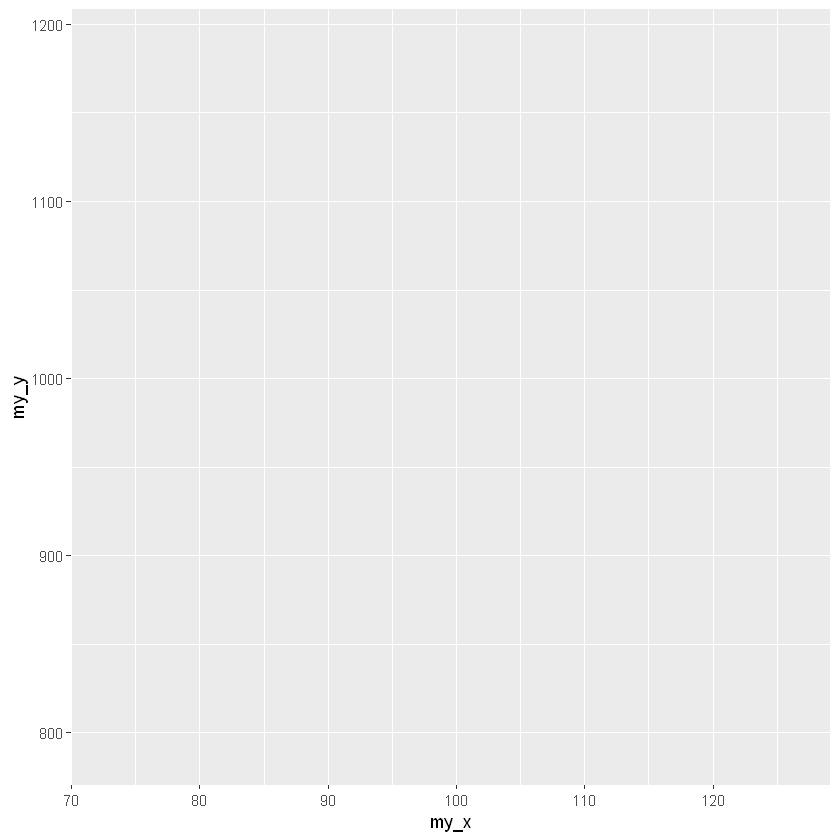

In [59]:
library(data.table)
library(ggplot2)
dt <- data.table(dat)
dt.melt <- melt(dt)
#now we add a column. since data.table are dataframe we can use the $
dt.melt$y <- rnorm( n = number_of_rows*3, mean = 1000, sd = 50 ) 
colnames(dt.melt) <- c("my_category","my_x","my_y")

#we start to create our plot


p <- ggplot(dt.melt, aes(x=my_x, y=my_y, color=factor(my_category)))
p

In [ ]:
- the plot is empty so we need to add something and change some settings and since we like customization
we create our own ggplot theme

In [88]:
theme_geo <- function(){ 
    font <- "sans"   #assign font family up front
    
    theme_bw() %+replace%    #replace elements we want to change
    
    theme(
      
      #grid elements
      panel.grid.major = element_blank(),    #strip major gridlines
      panel.grid.minor = element_blank(),    #strip minor gridlines
      
      
      #since theme_minimal() already strips axis lines, 
      #we don't need to do that again
      
      #text elements
      plot.title = element_text(             #title
                   family = font,            #set font family
                   size = 20,                #set font size
                   face = 'bold',            #bold typeface
                   hjust = 0,                #left align
                   vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
                   family = font,            #font family
                   size = 14),               #font size
      
      plot.caption = element_text(           #caption
                   family = font,            #font family
                   size = 9,                 #font size
                   hjust = 1),               #right align
      
      axis.title = element_text(             #axis titles
                   family = font,            #font family
                   size = 10),               #font size
      
      axis.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = 9),                #font size
      
      axis.text.x = element_text(            #margin for axis text
                    margin=margin(5, b = 10))
      
      #since the legend often requires manual tweaking 
      #based on plot content, don't define it here
    )
}

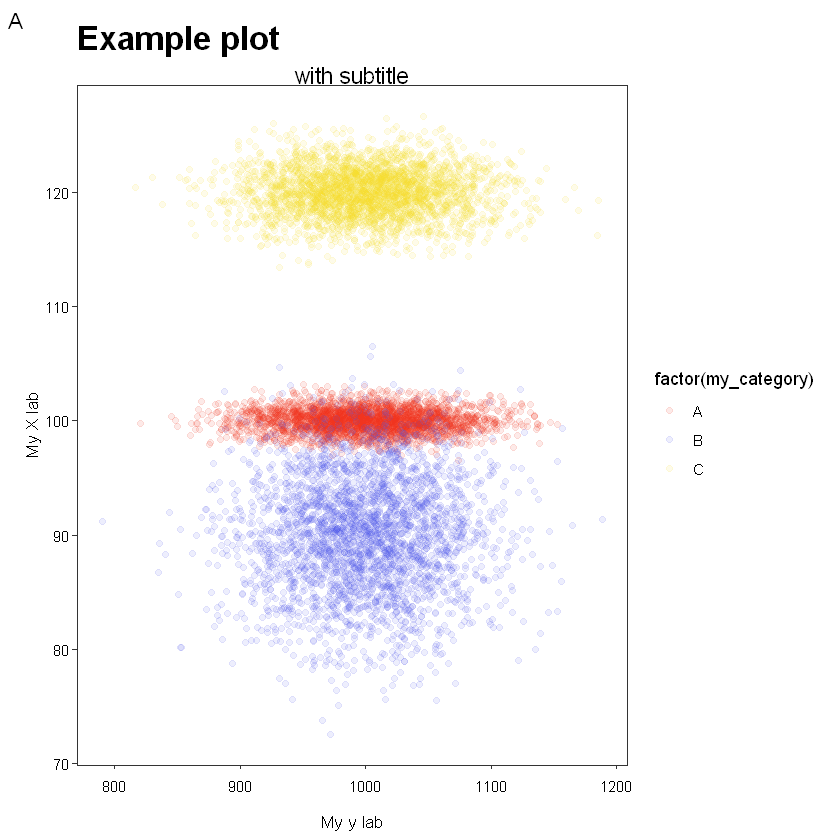

In [89]:
p + geom_jitter(position = position_jitter(0.2),alpha=1/10) +
    coord_flip() +
    scale_color_manual(values=c("#ED301B", "#4D55E8", "#F2DA25")) +
    labs(title = "Example plot",
         x     = "My X lab",
         y     = "My y lab",
         subtitle = "with subtitle",
         tag = "A") + 
         theme_geo()

In [ ]:
#and now all the rest